In [6]:
import pymysql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
connection = pymysql.connect(
        host='localhost',
        user='root',
        db='data_analysis',
        password='Manju123@'
    )
query1='select * from amazon'
df=pd.read_sql(query1,connection)

C:\Users\MANJU\AppData\Local\Temp\ipykernel_9316\3629552973.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql(query1,connection)


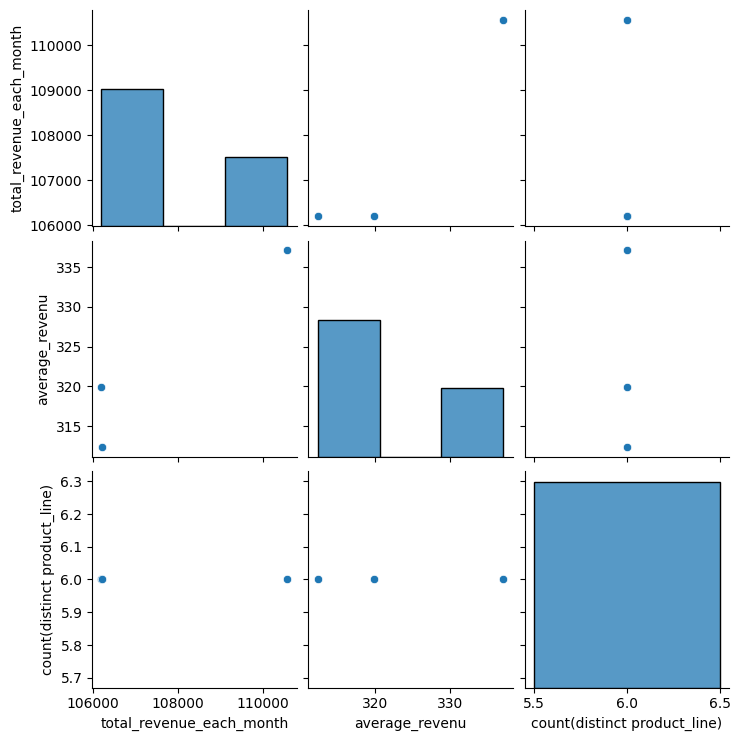

In [61]:
sns.pairplot(df)

In [9]:
import pandas as pd
query1='select product_line,count(*) as most_occur_item from amazon group by product_line order by most_occur_item desc'
df=pd.read_sql(query1,connection)

C:\Users\MANJU\AppData\Local\Temp\ipykernel_9316\1457582938.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql(query1,connection)


In [15]:
df=pd.DataFrame(df)

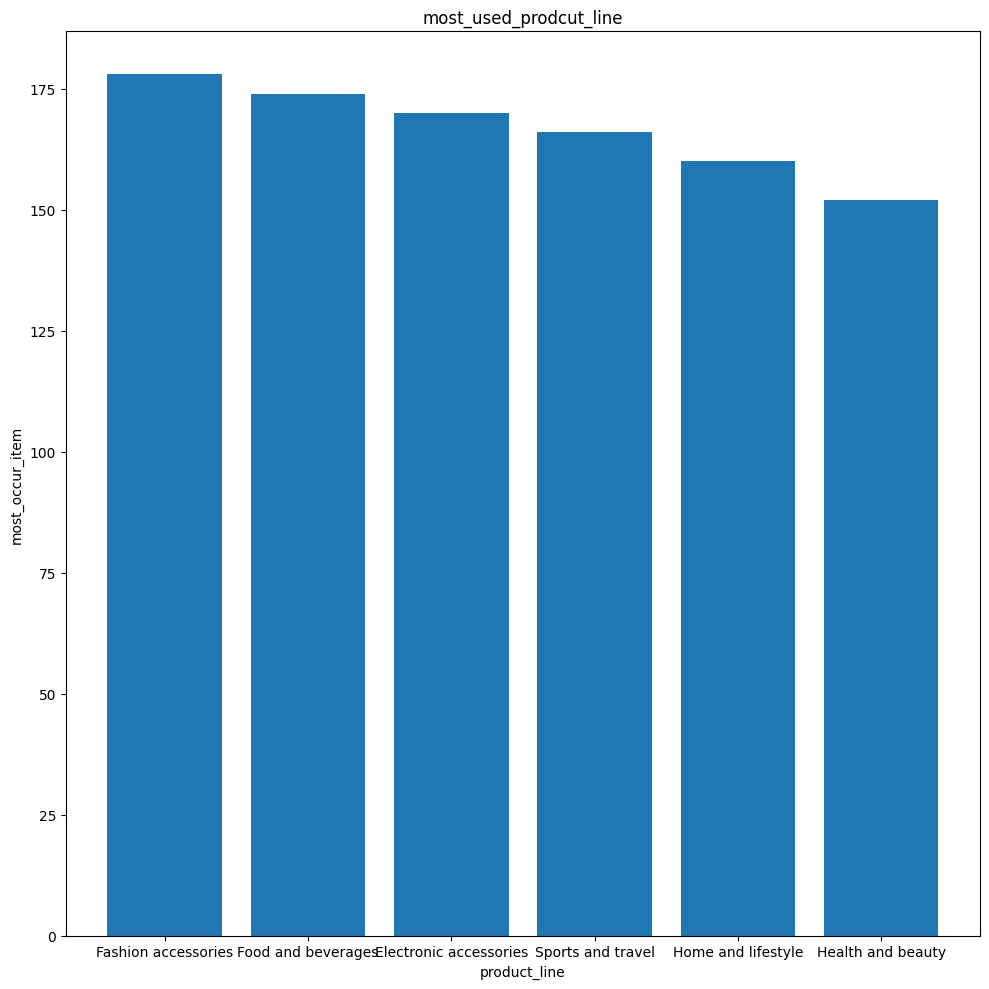

In [22]:
plt.figure(figsize=(10,10))
plt.bar(df['product_line'],df['most_occur_item'])
plt.title('most_used_prodcut_line')
plt.xlabel('product_line')	
plt.ylabel('most_occur_item')
plt.tight_layout()
plt.show()

In [ ]:
# distinct productline are 6 in that
# most occuring value is food and bevarages and electronic accessories in second place.

In [27]:
query1='SELECT product_line, SUM(total) AS total_sales, AVG(total) AS avg_sales, SUM(quantity) AS total_quantity_sold FROM amazon GROUP BY product_line ORDER BY total_sales DESC'
df=pd.read_sql(query1,connection)

C:\Users\MANJU\AppData\Local\Temp\ipykernel_9316\4145360444.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql(query1,connection)


In [28]:
df

,product_line,total_sales,avg_sales,total_quantity_sold
0,Food and beverages,56144.8440,322.671517,952.0
1,Sports and travel,55122.8265,332.065220,920.0
2,Electronic accessories,54337.5315,319.632538,971.0
3,Fashion accessories,54305.8950,305.089298,902.0
4,Home and lifestyle,53861.9130,336.636956,911.0
5,Health and beauty,49193.7390,323.643020,854.0


In [33]:
#Customer Analysis 
#This analysis aims to uncover the different customer segments, purchase trends and the profitability of each customer segment.*/
query='select gender,count(rating) from amazon group by gender' #both males and female almost customers gives equal ratings
df=pd.read_sql(query,connection)

C:\Users\MANJU\AppData\Local\Temp\ipykernel_9316\475465212.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql(query,connection)


In [34]:
df

,gender,count(rating)
0,Female,501
1,Male,499


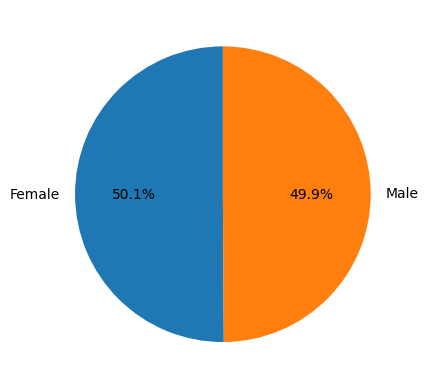

In [38]:
plt.pie(df['count(rating)'],labels=df['gender'],autopct='%1.1f%%', startangle=90)
plt.show()

In [56]:
query='select city,sum(total) as total_revenue_each_month,avg(total) average_revenu,count(distinct product_line),max(product_line) as most_occured from amazon group by city'
df=pd.read_sql(query,connection)

C:\Users\MANJU\AppData\Local\Temp\ipykernel_9316\3852403715.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql(query,connection)


In [57]:
df

,city,total_revenue_each_month,average_revenu,count(distinct product_line),most_occured
0,Mandalay,106197.6720,319.872506,6,Sports and travel
1,Naypyitaw,110568.7065,337.099715,6,Sports and travel
2,Yangon,106200.3705,312.354031,6,Sports and travel


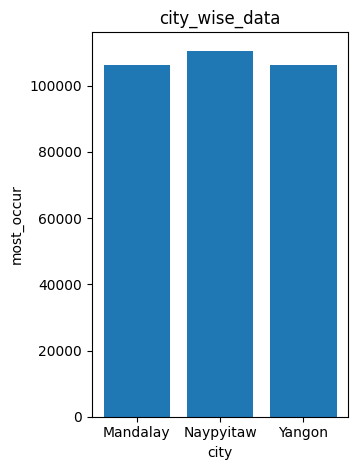

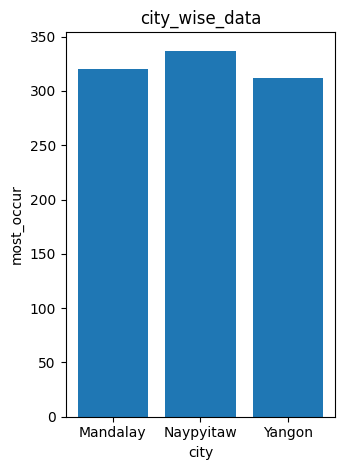

In [59]:
plt.subplot(1,2,1)
plt.bar(df['city'],df['total_revenue_each_month'])
plt.title('city_wise_data')
plt.xlabel('city')	
plt.ylabel('most_occur')
plt.tight_layout()
plt.show()
plt.subplot(1,2,2)
plt.bar(df['city'],df['average_revenu'])
plt.title('city_wise_data')
plt.xlabel('city')	
plt.ylabel('most_occur')
plt.tight_layout()
plt.show()